# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.156  1  0.278 0.599 0.001   
                             age        0.020  1  0.036 0.850 0.000   
                             Kiel       1.572  1  2.797 0.096 0.014   
                             Magdeburg  5.043  1  8.973 0.003 0.045   
                             Sweden     7.565  1 13.460 0.000 0.066   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.010  1  0.011 0.916 0.000   
                             age        0.474  1  0.533 0.466 0.003   
                             Kiel       0.003  1  0.003 0.955 0.000   
                             Magdeburg  1.254  1  1.409 0.237 0.007   
                             Sweden    18.492  1 20.779 0.000 0.098   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.223  0.734    False  
                             age               0.071  0.914    False  
                             Kiel              1.017  0.202    False  
                             Magdeburg         2.508  0.013     True  
                             Sweden            3.500  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.038  0.953    False  
                             age               0.331  0.622    False  
                             Kiel              0.020  0.972    False  
                             Magdeburg         0.626  0.392    False  
                             Sweden            5.037  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.913  1  5.714 0.018 0.029   
                             age        0.010  1  0.061 0.805 0.000   
                             Kiel       0.434  1  2.717 0.101 0.014   
                             Magdeburg  0.891  1  5.575 0.019 0.028   
                             Sweden     2.395  1 14.990 0.000 0.073   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.669  1  1.296 0.256 0.007   
                             age        2.508  1  1.218 0.271 0.006   
                             Kiel       9.465  1  4.597 0.033 0.024   
                             Magdeburg 16.002  1  7.772 0.006 0.039   
                             Sweden     0.720  1  0.350 0.555 0.002   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.750  0.049     True  
                             age               0.094  0.878    False  
                             Kiel              0.996  0.198    False  
                             Magdeburg         1.716  0.053    False  
                             Sweden            3.829  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.591  0.401    False  
                             age               0.567  0.419    False  
                             Kiel              1.478  0.082    False  
                             Magdeburg         2.233  0.020     True  
                             Sweden            0.256  0.684    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.599         0.223  0.734    False   
                             Kiel      0.096         1.017  0.202    False   
                             Magdeburg 0.003         2.508  0.013     True   
                             Sweden    0.000         3.500  0.002     True   
                             age       0.850         0.071  0.914    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.916         0.038  0.953    False   
                             Kiel      0.955         0.020  0.972    False   
                             Magdeburg 0.237         0.626  0.392    False   
                             Sweden    0.000         5.037  0.000     True   
                             age       0.466         0.331  0.622    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.018         1.750  0.049     True  
                             Kiel      0.101         0.996  0.198    False  
                             Magdeburg 0.019         1.716  0.053    False  
                             Sweden    0.000         3.829  0.001     True  
                             age       0.805         0.094  0.878    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.256         0.591  0.401    False  
                             Kiel      0.033         1.478  0.082    False  
                             Magdeburg 0.006         2.233  0.020     True  
                             Sweden    0.555         0.256  0.684    False  
                             age       0.271         0.567  0.419    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.477     0.338     0.246         2.736     0.313
std       0.304         5.319     0.332     0.300         5.148     0.327
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.004         0.331     0.015     0.002         0.357     0.008
50%       0.121         0.918     0.242     0.091         1.041     0.182
75%       0.467         2.428     0.623     0.439         2.711     0.585
max       0.999       149.340     0.999     1.000        86.406     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49574/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.599         0.223   
A0A024R0T9;K7ER74;P02655                           AD     0.047         1.327   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.078         1.107   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.473         0.325   
A0A075B6H7                                         AD     0.165         0.782   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.021         1.674   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.211         0.676   
S4R3U6                                             AD     0.916         0.038   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.734    False   
A0A024R0T9;K7ER74;P02655                           AD      0.116    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.172    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.628    False   
A0A075B6H7                                         AD      0.303    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.062    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.361    False   
S4R3U6                                             AD      0.953    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.018         1.750   
A0A024R0T9;K7ER74;P02655                           AD     0.039         1.406   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.479         0.319   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.293         0.533   
A0A075B6H7                                         AD     0.106         0.973   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.087         1.063   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.422         0.375   
S4R3U6                                             AD     0.256         0.591   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.049     True  
A0A024R0T9;K7ER74;P02655                           AD      0.094    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.620    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.442    False  
A0A075B6H7                                         AD      0.207    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.250         1.402     0.333     0.249         1.490     0.322
std       0.289         1.604     0.315     0.294         1.762     0.319
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.012         0.364     0.038     0.009         0.358     0.029
50%       0.121         0.918     0.242     0.106         0.975     0.206
75%       0.432         1.931     0.593     0.438         2.023     0.585
max       0.999        20.524     0.999     1.000        23.759     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,995


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.599         0.223  0.734   
A0A024R0T9;K7ER74;P02655                           0.047         1.327  0.116   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.078         1.107  0.172   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.473         0.325  0.628   
A0A075B6H7                                         0.165         0.782  0.303   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.021         1.674  0.062   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.211         0.676  0.361   
S4R3U6                                             0.916         0.038  0.953   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.018   
A0A024R0T9;K7ER74;P02655                              False 0.039   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.479   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.293   
A0A075B6H7                                            False 0.106   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.087   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.422   
S4R3U6                                                False 0.256   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.750  0.049   
A0A024R0T9;K7ER74;P02655                                   1.406  0.094   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.319  0.620   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.533  0.442   
A0A075B6H7                                                 0.973  0.207   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.063  0.174   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.375  0.570   
S4R3U6                                                     0.591  0.401   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    960
PI (yes) - QRILC (yes)   356
PI (no)  - QRILC (yes)    70
PI (yes) - QRILC (no)     35
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49574/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A024QZX5;A0A087X1N8;P35237             0.599         0.223  0.734    False   
A0A075B6I0                               0.020         1.707  0.058    False   
A0A075B6J9                               0.105         0.980  0.217    False   
A0A087WWT2;Q9NPD7                        0.038         1.416  0.099    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.008         2.111  0.027     True   
...                                        ...           ...    ...      ...   
Q9NZU1                                   0.057         1.244  0.135    False   
Q9P0K9                                   0.017         1.763  0.052    False   
Q9UKB5                                   0.011         1.969  0.036     True   
Q9UNW1                                   0.009         2.026  0.032     True   
Q9UQ52                                   0.072         1.146  0.161    False   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A024QZX5;A0A087X1N8;P35237             0.018         1.750  0.049     True   
A0A075B6I0                               0.003         2.582  0.010     True   
A0A075B6J9                               0.007         2.171  0.022     True   
A0A087WWT2;Q9NPD7                        0.005         2.338  0.016     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.056         1.252  0.124    False   
...                                        ...           ...    ...      ...   
Q9NZU1                                   0.008         2.071  0.027     True   
Q9P0K9                                   0.008         2.079  0.027     True   
Q9UKB5                                   0.074         1.133  0.154    False   
Q9UNW1                                   0.098         1.010  0.193    False   
Q9UQ52                                   0.008         2.072  0.027     True   

                                              data  
                                         frequency  
protein groups                                      
A0A024QZX5;A0A087X1N8;P35237                   186  
A0A075B6I0                                     194  
A0A075B6J9                                     156  
A0A087WWT2;Q9NPD7                              193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
...                                            ...  
Q9NZU1                                          72  
Q9P0K9                                         192  
Q9UKB5                                         148  
Q9UNW1                                         171  
Q9UQ52                                         188  

[105 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.734,0.049,186,PI (no) - QRILC (yes)
A0A024R0T9;K7ER74;P02655,0.116,0.094,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.172,0.620,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.628,0.442,196,PI (no) - QRILC (no)
A0A075B6H7,0.303,0.207,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.317,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.062,0.174,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P84157-2,0.996,0.034,101,PI (no) - QRILC (yes),0.962
P12273,0.883,0.030,65,PI (no) - QRILC (yes),0.852
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.799,0.008,69,PI (no) - QRILC (yes),0.791
Q14563,0.754,0.047,61,PI (no) - QRILC (yes),0.707
J3KSJ8;Q9UD71;Q9UD71-2,0.718,0.024,51,PI (no) - QRILC (yes),0.694
...,...,...,...,...,...
P05023;P05023-4,0.065,0.045,135,PI (no) - QRILC (yes),0.020
Q96RW7;Q96RW7-2,0.058,0.039,80,PI (no) - QRILC (yes),0.019
P13667,0.041,0.058,99,PI (yes) - QRILC (no),0.017


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


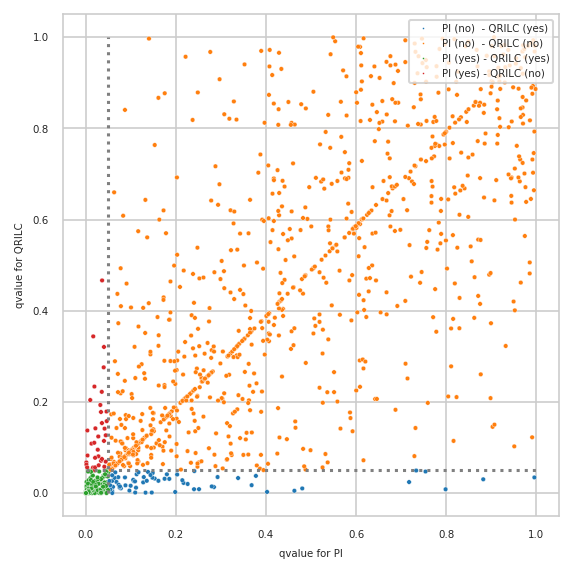

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


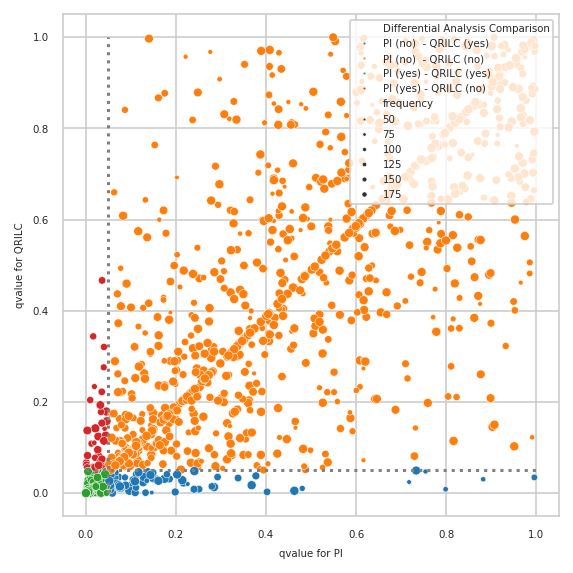

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out